## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

/Users/ofure/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading in the Datasets

In [2]:
df_consumer_price_indicators = pd.read_csv('Datasets/Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv')
df_crops_production_indicators = pd.read_csv('Datasets/Crops production indicators - FAOSTAT_data_en_2-22-2024.csv')
df_emissions = pd.read_csv("Datasets/Emissions - FAOSTAT_data_en_2-27-2024.csv")
df_employment = pd.read_csv('Datasets/Employment - FAOSTAT_data_en_2-27-2024.csv')
df_exchange_rate = pd.read_csv("Datasets/Exchange rate - FAOSTAT_data_en_2-22-2024.csv")
df_fertilizer = pd.read_csv('Datasets/Fertilizers use - FAOSTAT_data_en_2-27-2024.csv')
df_food_balance = pd.read_csv('Datasets/Food balances indicators - FAOSTAT_data_en_2-22-2024.csv')
df_food_security_indicators = pd.read_csv('Datasets/Food security indicators  - FAOSTAT_data_en_2-22-2024.csv')
df_food_trade_indicators = pd.read_csv('Datasets/Food trade indicators - FAOSTAT_data_en_2-22-2024.csv')
df_foreign_inv = pd.read_csv('Datasets/Foreign direct investment - FAOSTAT_data_en_2-27-2024.csv')
df_land_temp_change = pd.read_csv('Datasets/Land temperature change - FAOSTAT_data_en_2-27-2024.csv')
df_land_use = pd.read_csv('Datasets/Land use - FAOSTAT_data_en_2-22-2024.csv')
df_pesticide_use = pd.read_csv('Datasets/Pesticides use - FAOSTAT_data_en_2-27-2024.csv')



## Preliminary Cleaning

In [3]:
# Define a function to clean the 'Year' and 'Area' columns
def clean_data(df):
    # Ensure 'Year' is an integer
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)
    
    # Ensure 'Area' is a string
    df['Area'] = df['Area'].astype(str)

    # Ensure 'Value' is a float
    df['Value'] = df['Value'].astype(float)

    return df

# List of all your dataframes, replace these with your actual dataframe variables
dataframes = [df_consumer_price_indicators, df_crops_production_indicators, df_land_temp_change, df_fertilizer, df_food_balance, df_food_security_indicators, df_land_use, df_pesticide_use, df_food_trade_indicators, df_foreign_inv]
# Apply the cleaning function to each dataframe in place
for index in range(len(dataframes)):
    dataframes[index] = clean_data(dataframes[index])

## Merging the Dataset

### Food Trade Indicators (FTI) Dataset

In [4]:
df_food_trade_indicators.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1991,1991,1000 USD,41600.0,A,Official figure,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1992,1992,1000 USD,25600.0,E,Estimated value,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1993,1993,1000 USD,40000.0,E,Estimated value,NaN
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1994,1994,1000 USD,25700.0,E,Estimated value,NaN
4,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1995,1995,1000 USD,37720.0,E,Estimated value,NaN


In [5]:
df_food_trade_indicators.Element.unique()

array(['Import Value', 'Export Value'], dtype=object)

In [6]:
# Set element code to show just Export Value
df_food_trade_indicators = df_food_trade_indicators[df_food_trade_indicators['Element Code']== 5922]

# show the value in unit column
df_food_trade_indicators.Unit.unique()

array(['1000 USD'], dtype=object)

In [7]:

# Divided the values in Export value by 1000000 to have close range values in the column
df_food_trade_indicators['ExportValue'] = (df_food_trade_indicators['Value'] / 1000000)
df_food_trade_indicators.drop(['Value','Unit'], axis=1, inplace = True)
df_food_trade_indicators.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Flag,Flag Description,Note,ExportValue
19,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2009,2009,A,Official figure,NaN,0.000015
21,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2010,2010,A,Official figure,NaN,0.000054
23,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2011,2011,E,Estimated value,NaN,0.000000
25,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2012,2012,E,Estimated value,NaN,0.000000
27,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2013,2013,E,Estimated value,NaN,0.000000


### Consumer price Indicators (CPI) Dataset

In [8]:
df_consumer_price_indicators.head()

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Element Code,Element,Unit,Value,Flag,Flag Description,Note
0,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,6125,Value,NaN,24.356332,I,Imputed value,base year is 2015
1,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7002,February,6125,Value,NaN,23.636242,I,Imputed value,base year is 2015
2,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7003,March,6125,Value,NaN,23.485345,I,Imputed value,base year is 2015
3,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7004,April,6125,Value,NaN,24.767194,I,Imputed value,base year is 2015
4,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7005,May,6125,Value,NaN,25.956912,I,Imputed value,base year is 2015


In [9]:
df_consumer_price_indicators = df_consumer_price_indicators[df_consumer_price_indicators['Flag'] != 'E']
consumer_price = df_consumer_price_indicators.groupby(['Area','Year']).agg({'Value': 'mean'}).reset_index()
consumer_price.rename({'Value': 'avg_consumer_price'}, axis=1, inplace=True)
consumer_price.head(10)

,Area,Year,avg_consumer_price
0,Afghanistan,2000,26.629848
1,Afghanistan,2001,29.893548
2,Afghanistan,2002,35.344892
3,Afghanistan,2003,40.203113
4,Afghanistan,2004,45.840561
5,Afghanistan,2005,51.605262
6,Afghanistan,2006,54.836046
7,Afghanistan,2007,61.600075
8,Afghanistan,2008,86.898477
9,Afghanistan,2009,75.295292


### Merging FTI and CPI Dataset

In [10]:
merged_FTI_CPI = pd.merge(df_food_trade_indicators,consumer_price, left_on=['Area', 'Year'], right_on=['Area', 'Year'], how='left')
merged_FTI_CPI.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Flag,Flag Description,Note,ExportValue,avg_consumer_price
0,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2009,2009,A,Official figure,NaN,0.000015,75.295292
1,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2010,2010,A,Official figure,NaN,0.000054,75.083788
2,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2011,2011,E,Estimated value,NaN,0.000000,83.096066
3,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2012,2012,E,Estimated value,NaN,0.000000,87.028704
4,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2013,2013,E,Estimated value,NaN,0.000000,93.618813


### Foreign Direct Investment (FDI) Dataset

In [11]:
df_foreign_inv['FDIValue'] = (df_foreign_inv['Value']* 1000000)

pivoted_FDI = df_foreign_inv.pivot_table(index=['Area', 'Year'], columns= 'Item', values='FDIValue')

pivoted_FDI = pivoted_FDI.reset_index()
pivoted_FDI

Item,Area,Year,"FDI inflows to Agriculture, Forestry and Fishing","FDI inflows to Food, Beverages and Tobacco","FDI outflows to Agriculture, Forestry and Fishing","FDI outflows to Food, Beverages and Tobacco",Total FDI inflows,Total FDI outflows
0,Afghanistan,2000,NaN,NaN,NaN,NaN,170000.0,NaN
1,Afghanistan,2001,NaN,NaN,NaN,NaN,680000.0,NaN
2,Afghanistan,2002,NaN,NaN,NaN,NaN,50000000.0,NaN
3,Afghanistan,2003,NaN,NaN,NaN,NaN,57800000.0,1000000.0
4,Afghanistan,2004,NaN,NaN,NaN,NaN,186900000.0,-700000.0
...,...,...,...,...,...,...,...,...
4575,Zimbabwe,2018,NaN,NaN,NaN,NaN,745007943.0,26771877.0
4576,Zimbabwe,2019,NaN,NaN,NaN,NaN,280000000.0,32000000.0
4577,Zimbabwe,2020,NaN,NaN,NaN,NaN,194000000.0,33000000.0
4578,Zimbabwe,2021,NaN,NaN,NaN,NaN,250000000.0,32000000.0


In [12]:
#Merging FDI with FTI, CPI
Dataframe_merged = pd.merge(merged_FTI_CPI, pivoted_FDI, on =['Area', 'Year'], how='left')
Dataframe_merged.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Flag',
       'Flag Description', 'Note', 'ExportValue', 'avg_consumer_price',
       'FDI inflows to Agriculture, Forestry and Fishing',
       'FDI inflows to Food, Beverages and Tobacco',
       'FDI outflows to Agriculture, Forestry and Fishing',
       'FDI outflows to Food, Beverages and Tobacco', 'Total FDI inflows',
       'Total FDI outflows'],
      dtype='object')

In [13]:
# Drop NaNs columns in FDI
Dataframe_merged.drop(Dataframe_merged.columns[[15,16,17,18]], axis =1, inplace = True)
Dataframe_merged.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Flag,Flag Description,Note,ExportValue,avg_consumer_price,Total FDI inflows,Total FDI outflows
0,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2009,2009,A,Official figure,NaN,0.000015,75.295292,197512728.0,334959.0
1,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2010,2010,A,Official figure,NaN,0.000054,75.083788,54200551.0,-715034.0
2,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2011,2011,E,Estimated value,NaN,0.000000,83.096066,57620844.0,1177861.0
3,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2012,2012,E,Estimated value,NaN,0.000000,87.028704,40863937.0,-9039900.0
4,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2013,2013,E,Estimated value,NaN,0.000000,93.618813,48311346.0,537319.0


### Land Use Dataset

In [14]:
#get real landsize by multiplying value with unit
df_land_use['landsize'] = (df_land_use['Value'] * 1000)

#pivot so that each distinct item becomes a new column
pivoted_LU = df_land_use.pivot_table(index=['Area', 'Year'], columns = 'Item', values='landsize')

#reset the index
pivoted_LU = pivoted_LU.reset_index()

pivoted_LU

Item,Area,Year,Agricultural land,Agriculture,Agriculture area actually irrigated,Arable land,Country area,Cropland,Cropland area actually irrigated,Farm buildings and Farmyards,...,Land area actually irrigated,Land area equipped for irrigation,Perm. meadows & pastures - Cultivated,Perm. meadows & pastures - Nat. growing,Perm. meadows & pastures area actually irrig.,Permanent crops,Permanent meadows and pastures,Temporary crops,Temporary fallow,Temporary meadows and pastures
0,Afghanistan,1980,38049000.0,38049000.0,NaN,7910000.0,65286000.0,8049000.0,NaN,NaN,...,NaN,2505000.0,NaN,NaN,NaN,139000.0,30000000.0,NaN,NaN,NaN
1,Afghanistan,1981,38053000.0,38053000.0,NaN,7910000.0,65286000.0,8053000.0,NaN,NaN,...,NaN,2520000.0,NaN,NaN,NaN,143000.0,30000000.0,NaN,NaN,NaN
2,Afghanistan,1982,38054000.0,38054000.0,NaN,7910000.0,65286000.0,8054000.0,NaN,NaN,...,NaN,2535000.0,NaN,NaN,NaN,144000.0,30000000.0,NaN,NaN,NaN
3,Afghanistan,1983,38054000.0,38054000.0,NaN,7910000.0,65286000.0,8054000.0,NaN,NaN,...,NaN,2550000.0,NaN,NaN,NaN,144000.0,30000000.0,NaN,NaN,NaN
4,Afghanistan,1984,38054000.0,38054000.0,NaN,7910000.0,65286000.0,8054000.0,NaN,NaN,...,NaN,2581000.0,NaN,NaN,NaN,144000.0,30000000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9514,Zimbabwe,2017,16200000.0,16200000.0,NaN,4000000.0,39076000.0,4100000.0,NaN,NaN,...,NaN,186600.0,NaN,NaN,NaN,100000.0,12100000.0,3060830.2,496323.1,442846.7
9515,Zimbabwe,2018,16200000.0,16200000.0,NaN,4000000.0,39076000.0,4100000.0,NaN,NaN,...,NaN,186600.0,NaN,NaN,NaN,100000.0,12100000.0,3058670.8,500355.2,440974.0
9516,Zimbabwe,2019,16200000.0,16200000.0,NaN,4000000.0,39076000.0,4100000.0,NaN,NaN,...,NaN,186600.0,NaN,NaN,NaN,100000.0,12100000.0,3072462.2,484525.9,443011.9
9517,Zimbabwe,2020,16200000.0,16200000.0,NaN,4000000.0,39076000.0,4100000.0,NaN,NaN,...,NaN,186600.0,NaN,NaN,NaN,100000.0,12100000.0,3088313.1,473948.8,437738.1


In [15]:
#Keep only crop land since that is the represented landsize occupied by the crops
keep_LU = ['Area', 'Year', 'Cropland']
pivoted_LU = pivoted_LU[keep_LU]
pivoted_LU.tail()

Item,Area,Year,Cropland
9514,Zimbabwe,2017,4100000.0
9515,Zimbabwe,2018,4100000.0
9516,Zimbabwe,2019,4100000.0
9517,Zimbabwe,2020,4100000.0
9518,Zimbabwe,2021,4100000.0


In [16]:
#Adding Previously merged Dataset to the pivoted Land Use
Dataframe_merged = pd.merge(Dataframe_merged, pivoted_LU, on = ['Area', 'Year'], how='left')

### Crop Production Indicator Dataset

In [17]:
#Get Yeild by Multiplying value with unit (100g/ha = 0.1kg/ha)
df_crops_production_indicators['YeildValue'] = (df_crops_production_indicators['Value'] * 0.1)

#aggregate of YeildValue by area and Year
Crop_PI_agg = df_crops_production_indicators.groupby(['Area', 'Year']).agg({'YeildValue':'mean'}).reset_index()
Crop_PI_agg.head()

,Area,Year,YeildValue
0,Afghanistan,2000,6017.790909
1,Afghanistan,2001,6070.127273
2,Afghanistan,2002,6113.536364
3,Afghanistan,2003,6120.918182
4,Afghanistan,2004,6144.945455


In [18]:
# Merging Crop Production Indicator to the previously merged Dataset
Dataframe_merged = pd.merge(Dataframe_merged, Crop_PI_agg, on=['Area', 'Year'], how='left')
Dataframe_merged.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Flag,Flag Description,Note,ExportValue,avg_consumer_price,Total FDI inflows,Total FDI outflows,Cropland,YeildValue
0,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2009,2009,A,Official figure,NaN,0.000015,75.295292,197512728.0,334959.0,7916000.0,7228.036364
1,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2010,2010,A,Official figure,NaN,0.000054,75.083788,54200551.0,-715034.0,7917000.0,6121.218182
2,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2011,2011,E,Estimated value,NaN,0.000000,83.096066,57620844.0,1177861.0,7915000.0,6218.036364
3,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2012,2012,E,Estimated value,NaN,0.000000,87.028704,40863937.0,-9039900.0,7914000.0,6053.872727
4,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2013,2013,E,Estimated value,NaN,0.000000,93.618813,48311346.0,537319.0,7910000.0,6512.609091


### Emissions Dataset

In [19]:
#drop entries for items not named 'All Crops'
emissions = df_emissions[df_emissions['Item Code (CPC)'] == 'F1712']

In [20]:
# Pivot the data so that each distinct item becomes a new column
pivoted_emissions = emissions.pivot_table(index=['Area', 'Year'], columns='Element', values='Value') #Value in kilotonnes

# Reset the index to make 'Area' and 'Year' regular columns
pivoted_emissions = pivoted_emissions.reset_index()

# Display the first few rows of the pivoted dataframe
pivoted_emissions.head()

Element,Area,Year,Crops total (Emissions CH4),Crops total (Emissions N2O)
0,Afghanistan,2000,20.8471,0.7056
1,Afghanistan,2001,19.2605,0.7054
2,Afghanistan,2002,21.2553,1.0656
3,Afghanistan,2003,23.7017,1.3117
4,Afghanistan,2004,30.3089,1.0856


In [21]:

#Merging emissions dataframe with the already merged datasets
Dataframe_merged = pd.merge(Dataframe_merged, pivoted_emissions, on=['Area', 'Year'], how='left')
Dataframe_merged.rename({'Cropland' : 'Cropland_Size'}, axis=1, inplace=True)
Dataframe_merged.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,...,Flag Description,Note,ExportValue,avg_consumer_price,Total FDI inflows,Total FDI outflows,Cropland_Size,YeildValue,Crops total (Emissions CH4),Crops total (Emissions N2O)
0,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2009,2009,...,Official figure,NaN,0.000015,75.295292,197512728.0,334959.0,7916000.0,7228.036364,31.4614,1.7949
1,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2010,2010,...,Official figure,NaN,0.000054,75.083788,54200551.0,-715034.0,7917000.0,6121.218182,32.4707,1.6478
2,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2011,2011,...,Estimated value,NaN,0.000000,83.096066,57620844.0,1177861.0,7915000.0,6218.036364,32.6219,1.3478
3,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2012,2012,...,Estimated value,NaN,0.000000,87.028704,40863937.0,-9039900.0,7914000.0,6053.872727,32.1035,1.7697
4,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2013,2013,...,Estimated value,NaN,0.000000,93.618813,48311346.0,537319.0,7910000.0,6512.609091,32.1506,1.8067


### Fertilizer Use Dataset

In [22]:
#aggregate of YieldValue by area and Year
Fert_agg = df_fertilizer.groupby(['Area', 'Year']).agg({'Value': 'mean'}).reset_index()
Fert_agg.rename({'Value' : 'Fertilizer_usage'}, axis=1, inplace=True)

Fert_agg.head()

,Area,Year,Fertilizer_usage
0,Afghanistan,2002,17900.0
1,Afghanistan,2003,33200.0
2,Afghanistan,2004,45000.0
3,Afghanistan,2005,20577.0
4,Afghanistan,2006,68253.0


In [23]:
Dataframe_merged = pd.merge(Dataframe_merged, Fert_agg, on=['Area', 'Year'], how='left')
df_fertilizer.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2002,2002,t,17900.0,I,Imputed value
1,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2003,2003,t,33200.0,I,Imputed value
2,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2004,2004,t,47700.0,I,Imputed value
3,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2004,2004,t,42300.0,I,Imputed value
4,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2005,2005,t,20577.0,I,Imputed value


### Pesticide Use Dataset

In [24]:
Pest_df = df_pesticide_use[df_pesticide_use['Item Code'] == 1357]

In [25]:
# Pivot the data so that each distinct item becomes a new column
pivoted_pest = Pest_df.pivot_table(index=['Area', 'Year'], columns='Element', values='Value') 

# Reset the index to make 'Area' and 'Year' regular columns
pivoted_pest = pivoted_pest.reset_index()

# Display the first few rows of the pivoted dataframe
pivoted_pest.head()

Element,Area,Year,Agricultural Use,Use per area of cropland,Use per value of agricultural production
0,Albania,2000,307.98,0.44,0.23
1,Albania,2001,319.38,0.46,0.23
2,Albania,2002,330.78,0.47,0.24
3,Albania,2003,342.17,0.49,0.24
4,Albania,2004,353.57,0.51,0.23


In [26]:
Dataframe_merged = pd.merge(Dataframe_merged, pivoted_pest, on=['Area', 'Year'], how='left')
Dataframe_merged.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,...,Total FDI inflows,Total FDI outflows,Cropland_Size,YeildValue,Crops total (Emissions CH4),Crops total (Emissions N2O),Fertilizer_usage,Agricultural Use,Use per area of cropland,Use per value of agricultural production
0,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2009,2009,...,197512728.0,334959.0,7916000.0,7228.036364,31.4614,1.7949,76599.0,NaN,NaN,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2010,2010,...,54200551.0,-715034.0,7917000.0,6121.218182,32.4707,1.6478,72084.0,NaN,NaN,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2011,2011,...,57620844.0,1177861.0,7915000.0,6218.036364,32.6219,1.3478,107228.0,NaN,NaN,NaN
3,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2012,2012,...,40863937.0,-9039900.0,7914000.0,6053.872727,32.1035,1.7697,NaN,NaN,NaN,NaN
4,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2013,2013,...,48311346.0,537319.0,7910000.0,6512.609091,32.1506,1.8067,NaN,NaN,NaN,NaN



## Exchange Rate, Employment Not used
I did not use any data from the exchange rate file as there was no need to convert to local currency since export value for all the countries were already in USD and other Currency related figures are in USD already. I also did not take any information from the employment data because the number of hours worked by workers have no correlation to price of produce if there is no corresponding data for remuneration of the worker per hour.

### Land Temperature Change Dataset

In [27]:
#drop entries for items not named 'Pesticides (total)' -- other categories fall under pesticides
Land_Temp_df = df_land_temp_change[df_land_temp_change['Months Code'] == 7020]

# to remove records for 'standard deviation'
Land_Temp_df = Land_Temp_df[Land_Temp_df['Element'] == 'Temperature change' ]

In [28]:
columns_to_keep = ['Area', 'Year','Value']
Land_Temp_df = Land_Temp_df[columns_to_keep]
Land_Temp_df.rename({'Value' : 'Temp_change'}, axis=1, inplace=True)
Land_Temp_df.head()

,Area,Year,Temp_change
184,Afghanistan,2000,0.993
185,Afghanistan,2001,1.311
186,Afghanistan,2002,1.365
187,Afghanistan,2003,0.587
188,Afghanistan,2004,1.373


In [29]:
#Merging Land Temperature with previously merged datasets
Dataframe_merged = pd.merge(Dataframe_merged, Land_Temp_df, on=['Area', 'Year'], how='left')
Dataframe_merged.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,...,Total FDI outflows,Cropland_Size,YeildValue,Crops total (Emissions CH4),Crops total (Emissions N2O),Fertilizer_usage,Agricultural Use,Use per area of cropland,Use per value of agricultural production,Temp_change
0,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2009,2009,...,334959.0,7916000.0,7228.036364,31.4614,1.7949,76599.0,NaN,NaN,NaN,0.895
1,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2010,2010,...,-715034.0,7917000.0,6121.218182,32.4707,1.6478,72084.0,NaN,NaN,NaN,1.613
2,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2011,2011,...,1177861.0,7915000.0,6218.036364,32.6219,1.3478,107228.0,NaN,NaN,NaN,1.397
3,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2012,2012,...,-9039900.0,7914000.0,6053.872727,32.1035,1.7697,NaN,NaN,NaN,NaN,0.223
4,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2013,2013,...,537319.0,7910000.0,6512.609091,32.1506,1.8067,NaN,NaN,NaN,NaN,1.281


### Food Security Indicators

In [30]:
#retain only data for political instability, per capital food production and food supply variability 
food_security_df = df_food_security_indicators[(df_food_security_indicators['Item Code']== 21030) | (df_food_security_indicators['Item Code']== 21031) | (df_food_security_indicators['Item Code']== 21032)]

# Pivot the data so that each distinct item becomes a new column
pivoted_food_security = food_security_df.pivot_table(index=['Area', 'Year'], columns='Item Code', values='Value') 

# Reset the index to make 'Area' and 'Year' regular columns
pivoted_food_security = pivoted_food_security.reset_index()

# Display the first few rows of the pivoted dataframe
pivoted_food_security.head()

Item Code,Area,Year,21030,21031,21032
0,Afghanistan,2000,NaN,58.0,-2.44
1,Afghanistan,2001,16.3,47.0,NaN
2,Afghanistan,2002,21.0,71.0,-2.04
3,Afghanistan,2003,20.8,72.0,-2.20
4,Afghanistan,2004,17.3,50.0,-2.30


In [31]:
pivoted_food_security.rename({21030 : 'Per_capita_foodprod',21031 : 'Per_capita_foodsupply', 21032 : 'Politics_terror_Index' }, axis=1, inplace=True)

pivoted_food_security['Per_capita_foodprod'] = (pivoted_food_security['Per_capita_foodprod'] * 1000)
pivoted_food_security.head()

Item Code,Area,Year,Per_capita_foodprod,Per_capita_foodsupply,Politics_terror_Index
0,Afghanistan,2000,NaN,58.0,-2.44
1,Afghanistan,2001,16300.0,47.0,NaN
2,Afghanistan,2002,21000.0,71.0,-2.04
3,Afghanistan,2003,20800.0,72.0,-2.20
4,Afghanistan,2004,17300.0,50.0,-2.30


In [32]:
pivoted_food_security['Year']=pivoted_food_security['Year'].astype('int64')
df = pd.merge(Dataframe_merged, pivoted_food_security, on=['Area', 'Year'], how='left')
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,...,Crops total (Emissions CH4),Crops total (Emissions N2O),Fertilizer_usage,Agricultural Use,Use per area of cropland,Use per value of agricultural production,Temp_change,Per_capita_foodprod,Per_capita_foodsupply,Politics_terror_Index
0,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2009,2009,...,31.4614,1.7949,76599.0,NaN,NaN,NaN,0.895,8900.0,31.0,-2.71
1,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2010,2010,...,32.4707,1.6478,72084.0,NaN,NaN,NaN,1.613,10900.0,18.0,-2.58
2,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2011,2011,...,32.6219,1.3478,107228.0,NaN,NaN,NaN,1.397,11200.0,62.0,-2.50
3,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2012,2012,...,32.1035,1.7697,NaN,NaN,NaN,NaN,0.223,9500.0,58.0,-2.42
4,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2013,2013,...,32.1506,1.8067,NaN,NaN,NaN,NaN,1.281,9500.0,59.0,-2.52


### Food Balance Indicators

In [33]:
df_food_balance.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2010,2010,1000 t,2000.0,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2011,2011,1000 t,2448.0,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2012,2012,1000 t,2001.0,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2013,2013,1000 t,2155.0,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2014,2014,1000 t,1840.0,E,Estimated value


In [34]:
#convert to tonnes
df_food_balance['Value'] = (df_food_balance['Value'] * 1000)

#aggregate of Value by area,Year and Element
Food_balance_agg = df_food_balance.groupby(['Area', 'Year', 'Element']).agg({'Value': 'mean'}).reset_index()
Food_balance_agg.head()

,Area,Year,Element,Value
0,Afghanistan,2010,Export Quantity,32727.272727
1,Afghanistan,2010,Food,635203.750000
2,Afghanistan,2010,Import Quantity,207800.666667
3,Afghanistan,2010,Losses,96166.666667
4,Afghanistan,2010,Other uses (non-food),107500.000000


In [35]:
# Pivot the data so that each distinct item becomes a new column
pivoted_FD = Food_balance_agg.pivot_table(index=['Area', 'Year'], columns='Element', values='Value') 

# Reset the index to make 'Area' and 'Year' regular columns
pivoted_FD = pivoted_FD.reset_index()
pivoted_FD.rename({'Losses' : 'Storage_Losses', 'Food' : 'Food_uses'}, axis=1, inplace=True)
# Display the first few rows of the pivoted dataframe
pivoted_FD.head()

Element,Area,Year,Export Quantity,Food_uses,Import Quantity,Storage_Losses,Other uses (non-food)
0,Afghanistan,2010,32727.272727,635203.75,207800.666667,96166.666667,107500.0
1,Afghanistan,2011,25181.818182,644437.50,267642.857143,77833.333333,128500.0
2,Afghanistan,2012,18000.000000,685173.75,267071.428571,100500.000000,221000.0
3,Afghanistan,2013,25545.454545,712472.50,281785.714286,103333.333333,214000.0
4,Afghanistan,2014,25750.000000,866460.00,304764.705882,111500.000000,9000.0


In [36]:
#Merging Food balance to the already merged dataset

Dataframe_merged = pd.merge(Dataframe_merged, pivoted_FD, on=['Area', 'Year'], how='left')
Dataframe_merged.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,...,Fertilizer_usage,Agricultural Use,Use per area of cropland,Use per value of agricultural production,Temp_change,Export Quantity,Food_uses,Import Quantity,Storage_Losses,Other uses (non-food)
0,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2009,2009,...,76599.0,NaN,NaN,NaN,0.895,NaN,NaN,NaN,NaN,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2010,2010,...,72084.0,NaN,NaN,NaN,1.613,32727.272727,635203.75,207800.666667,96166.666667,107500.0
2,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2011,2011,...,107228.0,NaN,NaN,NaN,1.397,25181.818182,644437.50,267642.857143,77833.333333,128500.0
3,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2012,2012,...,NaN,NaN,NaN,NaN,0.223,18000.000000,685173.75,267071.428571,100500.000000,221000.0
4,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2013,2013,...,NaN,NaN,NaN,NaN,1.281,25545.454545,712472.50,281785.714286,103333.333333,214000.0


### Checking If NaNs Exist

In [37]:
Dataframe_merged.isnull().sum()

Domain Code                                     0
Domain                                          0
Area Code (M49)                                 0
Area                                            0
Element Code                                    0
Element                                         0
Item Code (CPC)                                 0
Item                                            0
Year Code                                       0
Year                                            0
Flag                                            0
Flag Description                                0
Note                                        67824
ExportValue                                     0
avg_consumer_price                          20486
Total FDI inflows                           19667
Total FDI outflows                          28312
Cropland_Size                                2549
YeildValue                                  18320
Crops total (Emissions CH4)                 22136


### Renaming and Dropping Irrelevant Columns

In [38]:
#drop unneccesary columns and rename a few
# drop all the non numeric columns because this is a regression problem
# Our prediction is a numeric value
Dataframe_merged.drop(['Domain','Domain Code', 'Flag', 'Element Code', 'Year Code', 'Item Code (CPC)', 'Flag Description','Note'] , axis=1, inplace = True)
Dataframe_merged.rename({ 'Total FDI inflows' : 'FDI_Inflows'
          , 'Total FDI outflows' : 'FDI_Outflows', 'Crops total (Emissions CH4)' : 'CH4_Emissions'
          , 'Export Quantity' : 'Export_Quantity', 'Crops total (Emissions N2O)' : 'N2O_Emissions'
          , 'Import Quantity' : 'Import_Quantity', 'Other uses (non-food)' : 'Non_food_uses'}, axis=1, inplace=True)


Dataframe_merged.rename({'Agricultural Use' : 'Agric_Pesticide_Use', 'Use per area of cropland' : 'Pesticide_per_cropland', 
           'Use per value of agricultural production' : 'Pesticide_per_agricvalue'
          }, axis=1, inplace=True)

Dataframe_merged.head()

,Area Code (M49),Area,Element,Item,Year,ExportValue,avg_consumer_price,FDI_Inflows,FDI_Outflows,Cropland_Size,...,Fertilizer_usage,Agric_Pesticide_Use,Pesticide_per_cropland,Pesticide_per_agricvalue,Temp_change,Export_Quantity,Food_uses,Import_Quantity,Storage_Losses,Non_food_uses
0,4,Afghanistan,Export Value,Cereals and Preparations,2009,0.000015,75.295292,197512728.0,334959.0,7916000.0,...,76599.0,NaN,NaN,NaN,0.895,NaN,NaN,NaN,NaN,NaN
1,4,Afghanistan,Export Value,Cereals and Preparations,2010,0.000054,75.083788,54200551.0,-715034.0,7917000.0,...,72084.0,NaN,NaN,NaN,1.613,32727.272727,635203.75,207800.666667,96166.666667,107500.0
2,4,Afghanistan,Export Value,Cereals and Preparations,2011,0.000000,83.096066,57620844.0,1177861.0,7915000.0,...,107228.0,NaN,NaN,NaN,1.397,25181.818182,644437.50,267642.857143,77833.333333,128500.0
3,4,Afghanistan,Export Value,Cereals and Preparations,2012,0.000000,87.028704,40863937.0,-9039900.0,7914000.0,...,NaN,NaN,NaN,NaN,0.223,18000.000000,685173.75,267071.428571,100500.000000,221000.0
4,4,Afghanistan,Export Value,Cereals and Preparations,2013,0.000000,93.618813,48311346.0,537319.0,7910000.0,...,NaN,NaN,NaN,NaN,1.281,25545.454545,712472.50,281785.714286,103333.333333,214000.0


## PCA to Fill in NaNs

In [39]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def fill_na_with_pca(df, n_components=None):
    # Ensure that the DataFrame is numeric
    numeric_df = Dataframe_merged.select_dtypes(include=[np.number])
    
    # Standardize the data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(numeric_df)
    
    # Replace NaNs with zeroes temporarily
    nan_mask = np.isnan(standardized_data)
    standardized_data[nan_mask] = 0
    
    # Determine the valid range for n_components
    n_samples, n_features = standardized_data.shape
    if n_components is None or n_components > min(n_samples, n_features):
        n_components = min(n_samples, n_features)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca.fit(standardized_data)
    
    # Transform the data using PCA
    pca_data = pca.transform(standardized_data)
    
    # Inverse transform the data to reconstruct the original values
    reconstructed_data = pca.inverse_transform(pca_data)
    
    # Replace NaNs with the reconstructed data
    filled_data = np.where(nan_mask, reconstructed_data, standardized_data)
    
    # Reverse the standardization
    filled_data = scaler.inverse_transform(filled_data)
    
    # Replace the original numeric columns with the filled data
    filled_df = Dataframe_merged.copy()
    filled_df[numeric_df.columns] = filled_data
    
    return filled_df

# Example usage
# Ensure DAF is defined and a DataFrame
filled_DF = fill_na_with_pca(Dataframe_merged, n_components=15)


In [40]:
filled_DF.head()

,Area Code (M49),Area,Element,Item,Year,ExportValue,avg_consumer_price,FDI_Inflows,FDI_Outflows,Cropland_Size,...,Fertilizer_usage,Agric_Pesticide_Use,Pesticide_per_cropland,Pesticide_per_agricvalue,Temp_change,Export_Quantity,Food_uses,Import_Quantity,Storage_Losses,Non_food_uses
0,4.0,Afghanistan,Export Value,Cereals and Preparations,2009.0,0.000015,75.295292,1.975127e+08,334959.0,7916000.0,...,76599.000000,13592.499295,3.281049,0.976732,0.895,430771.983091,2.347589e+06,570378.647219,352734.925761,981283.046739
1,4.0,Afghanistan,Export Value,Cereals and Preparations,2010.0,0.000054,75.083788,5.420055e+07,-715034.0,7917000.0,...,72084.000000,12218.189865,3.320096,0.967200,1.613,32727.272727,6.352038e+05,207800.666667,96166.666667,107500.000000
2,4.0,Afghanistan,Export Value,Cereals and Preparations,2011.0,0.000000,83.096066,5.762084e+07,1177861.0,7915000.0,...,107228.000000,11170.331776,3.320612,0.970742,1.397,25181.818182,6.444375e+05,267642.857143,77833.333333,128500.000000
3,4.0,Afghanistan,Export Value,Cereals and Preparations,2012.0,0.000000,87.028704,4.086394e+07,-9039900.0,7914000.0,...,170524.739097,10198.505198,3.309704,0.975395,0.223,18000.000000,6.851738e+05,267071.428571,100500.000000,221000.000000
4,4.0,Afghanistan,Export Value,Cereals and Preparations,2013.0,0.000000,93.618813,4.831135e+07,537319.0,7910000.0,...,171240.662344,10648.012696,3.323318,0.970731,1.281,25545.454545,7.124725e+05,281785.714286,103333.333333,214000.000000


In [41]:
filled_DF.isnull().sum()

Area Code (M49)             0
Area                        0
Element                     0
Item                        0
Year                        0
ExportValue                 0
avg_consumer_price          0
FDI_Inflows                 0
FDI_Outflows                0
Cropland_Size               0
YeildValue                  0
CH4_Emissions               0
N2O_Emissions               0
Fertilizer_usage            0
Agric_Pesticide_Use         0
Pesticide_per_cropland      0
Pesticide_per_agricvalue    0
Temp_change                 0
Export_Quantity             0
Food_uses                   0
Import_Quantity             0
Storage_Losses              0
Non_food_uses               0
dtype: int64

### Saving the Dataframe in a CSV file

In [42]:

filled_DF.to_csv('Datasets/my_dataframes.csv', index = False)

### Capping Outliers

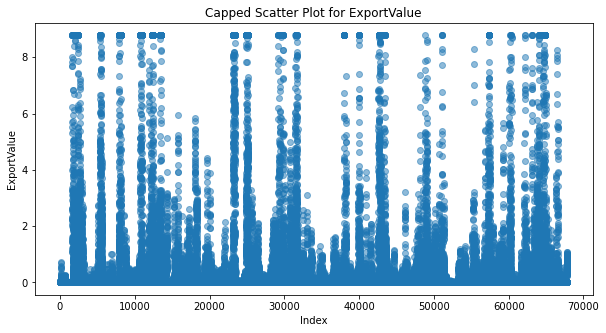

In [43]:

def cap_outliers(df, column):
    
    if column in df.columns:
        # Calculate quantiles
        lower_quantile = df[column].quantile(0.01)
        upper_quantile = df[column].quantile(0.99)
        
        # Cap values
        df[column] = np.where(df[column] < lower_quantile, lower_quantile, df[column])
        df[column] = np.where(df[column] > upper_quantile, upper_quantile, df[column])
    else:
        print(f"Column {column} not found in DataFrame.")
    return df


# Choose the column to cap; modify 'column_name' to your specific column of interest
column_name = 'ExportValue'

if column_name in filled_DF.columns:
    # Cap outliers in the specified column
    filled_DF = cap_outliers(filled_DF, column_name)
    
    # Plotting to visualize the effect of capping
    plt.figure(figsize=(10, 5))
    plt.scatter(filled_DF.index, filled_DF[column_name], alpha=0.5)
    plt.title(f'Capped Scatter Plot for {column_name}')
    plt.xlabel('Index')
    plt.ylabel(column_name)
    plt.show()
else:
    print(f"The column '{column_name}' does not exist in the DataFrame.")


### Heat Correlation Map

Correlation with 'Export Value':
ExportValue                 1.000000
Export_Quantity             0.505691
Agric_Pesticide_Use         0.408111
Import_Quantity             0.372499
N2O_Emissions               0.347780
Cropland_Size               0.327561
FDI_Outflows                0.308974
FDI_Inflows                 0.304961
YeildValue                  0.299239
Fertilizer_usage            0.219245
Storage_Losses              0.212054
Non_food_uses               0.204490
Food_uses                   0.202512
CH4_Emissions               0.186041
Year                        0.130596
Temp_change                 0.106022
Pesticide_per_cropland      0.058107
Pesticide_per_agricvalue    0.043571
avg_consumer_price         -0.006218
Area Code (M49)            -0.020477
Name: ExportValue, dtype: float64


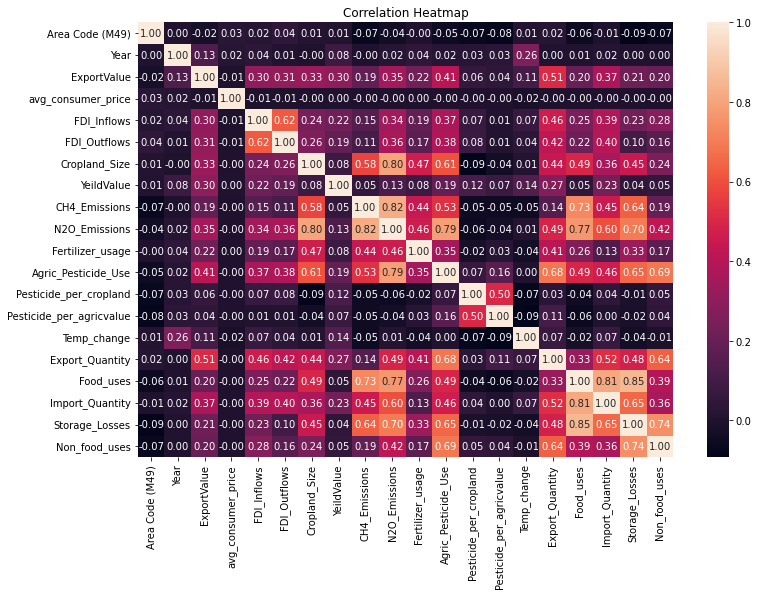

In [44]:
# Compute the correlation matrix for the filled DataFrame
correlation_matrix = filled_DF.corr()

# Extract and display correlations of all features with 'EXPORT VALUE'
export_value_correlation = correlation_matrix['ExportValue'].sort_values(ascending=False)
print("Correlation with 'Export Value':")
print(export_value_correlation)

# Plot the heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(filled_DF.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Multilayer Perceptron Model (MLP)

In [45]:

pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [46]:
filled_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67824 entries, 0 to 67823
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area Code (M49)           67824 non-null  float64
 1   Area                      67824 non-null  object 
 2   Element                   67824 non-null  object 
 3   Item                      67824 non-null  object 
 4   Year                      67824 non-null  float64
 5   ExportValue               67824 non-null  float64
 6   avg_consumer_price        67824 non-null  float64
 7   FDI_Inflows               67824 non-null  float64
 8   FDI_Outflows              67824 non-null  float64
 9   Cropland_Size             67824 non-null  float64
 10  YeildValue                67824 non-null  float64
 11  CH4_Emissions             67824 non-null  float64
 12  N2O_Emissions             67824 non-null  float64
 13  Fertilizer_usage          67824 non-null  float64
 14  Agric_

### Preparing the Data

In [47]:

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

selected_features = [
    'Export_Quantity',    
    'Agric_Pesticide_Use',       
    'Import_Quantity',             
    'N2O_Emissions',             
    'Cropland_Size',               
    'FDI_Outflows',               
    'FDI_Inflows',                 
    'YeildValue',                  
    'Fertilizer_usage'
]

X = filled_DF[selected_features]
y = filled_DF['ExportValue']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

### Building the MLP Model 

In [48]:
# Step 2: Preprocessing Pipeline
# Create a column transformer with the necessary preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit and transform the training data, and transform the testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


### Training and Predicting

In [49]:
#Define and Train the MLPRegressor Model
mlp = MLPRegressor(hidden_layer_sizes=(100, 100),  # Two hidden layers with 100 neurons each
                   activation='relu',             # ReLU activation function
                   solver='adam',                 # Adam optimizer
                   alpha=0.001,                   # L2 penalty (regularization term)
                   early_stopping=True,           # Regularization parameter to manage overfitting
                   validation_fraction=0.1,                                  
                   learning_rate='adaptive',      # Adaptive learning rate
                   max_iter=1000,                  # Maximum number of iterations
                   random_state=42)

# Train the model
mlp.fit(X_train_processed, y_train)

MLPRegressor(alpha=0.001, early_stopping=True, hidden_layer_sizes=(100, 100),
             learning_rate='adaptive', max_iter=1000, random_state=42)

### Training Loss Curve

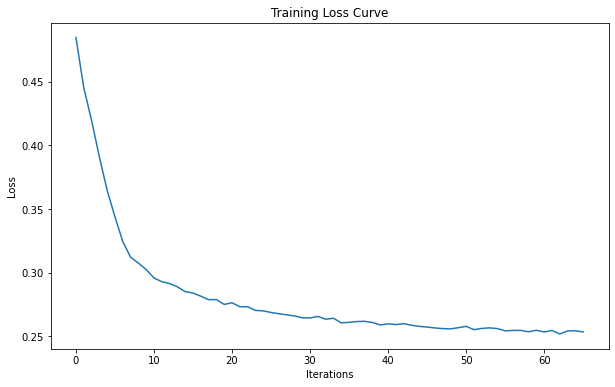

In [50]:
# Visualize Training Loss to Monitor Overfitting
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

### Evaluate the Model

In [51]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Make predictions
y_pred = mlp.predict(X_test_processed)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE


print(f'R-squared: {r2}')
print(f'Mean_squared_error: {mse}')
print(f'Mean_absolute_error: {mae}')
print(f'RMSE: {rmse}')


R-squared: 0.6823253809333296
Mean_squared_error: 0.4852644491109697
Mean_absolute_error: 0.249461607905078
RMSE: 0.6966092513819852


## PREDICTIONS

In [52]:
results_df = pd.DataFrame({'Instance_ID': range(len(y_test)), 'True_label': y_test, 'Predicted': y_pred})


# Print the DataFrame
print(results_df)

       Instance_ID  True_label  Predicted
45548            0    0.025862   0.128432
49602            1    0.000913   0.065335
44519            2    0.000053   0.170440
33589            3    0.005383   0.161724
55187            4    0.325198   0.413689
...            ...         ...        ...
39482        13560    0.001978   0.049752
18432        13561    0.003031  -0.008391
11711        13562    0.000027   0.012857
35696        13563    0.000000   0.005232
34934        13564    0.022463   0.114250

[13565 rows x 3 columns]


In [53]:
results_df.to_csv('Datasets/Predictions.csv', index = True)